<a href="https://colab.research.google.com/github/zoya-ivanova/-Data-Science/blob/main/sem_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные понятия
1. Что такое кластеризация?  
- Кластеризация - это процесс разбиения набора данных на группы (кластеры) таким образом, чтобы объекты внутри одной группы были более похожи друг на друга, чем на объекты из других групп.  
- Кластеризация является одним из методов машинного обучения без учителя, так как она не использует заранее известные метки классов.

2. Типы алгоритмов кластеризации  
- Иерархические алгоритмы (Agglomerative, Divisive)  
- Алгоритмы, основанные на центроидах (K-Means, K-Medoids)  
- Плотностные алгоритмы (DBSCAN, OPTICS)  
- Модельно-ориентированные алгоритмы (Gaussian Mixture Models)

3. Метрики для оценки качества кластеризации
- Силуэтный коэффициент  
- Коэффициент Калинского-Харабаша  
- Индекс Дэвиса-Болдина  

4. Применение кластеризации  
- Сегментация клиентов  
- Анализ социальных сетей  
- Обнаружение аномалий  
- Сжатие данных  
- Рекомендательные системы  

5. Решение задачи группировки данных
- Подготовка данных:
Обработка пропущенных значений
Масштабирование признаков

- Выбор алгоритма кластеризации:
Определение количества кластеров
Настройка гиперпараметров алгоритма

- Оценка качества кластеризации:
Применение метрик качества  
Визуализация результатов  

- Интерпретация полученных кластеров:
Анализ характеристик кластеров
Использование кластеров для дальнейшего анализа

Ключевые моменты:  
Кластеризация - это метод машинного обучения без учителя для группировки данных  
Существует множество алгоритмов кластеризации с различными подходами  
Важно правильно подготовить данные и оценить качество кластеризации  
Кластеризация широко применяется в различных областях для получения ценных инсайтов


# Задание 1  
Подготовить данные о вине для кластеризации, включая предобработку и масштабирование.  
* Прочитать данные о вине из CSV-файла.
* Проверить данные на наличие пропущенных значений и выбросов.
* Обработать пропущенные значения с помощью подходящих методов (например, заполнение средним, медианой, удаление).
* Преобразовать категориальные переменные в числовые.
* Масштабировать числовые переменные, чтобы все они имели одинаковый масштаб.


## Подключение необходимых библиотек и функций

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
import scipy.cluster.hierarchy as shc

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

import warnings
warnings.filterwarnings('ignore')

## Обзор датасета

In [ ]:
colnames = ['class', 'Alcohol', 'Malicacid',\
            'Ash', 'Alcalinity_of_ash', 'Magnesium','Total_phenols','Flavanoids',\
            'Nonflavanoid_phenols','Proanthocyanins',\
            'Color_intensity','Hue','0D280_0D315','Proline']

df = pd.read_csv('wine.data', sep=',', names = colnames, header=None )
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
Xcol = X.columns

In [ ]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malicacid             178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  0D280_0D315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


О признаках
1. Alcohol (Спиртовое вещество):
Процентное содержание алкоголя в вине. Этот параметр измеряет количественное содержание этанола в вине и влияет на его крепость.

2. Malic Acid (Яблочная кислота):
Количество яблочной кислоты в вине. Яблочная кислота придает вину свежесть и яркость.

3. Ash (Зольность):
Количество минеральных веществ (золы) в вине после испарения воды и сжигания остатков. Он отражает минеральность вина.

4. Alcalinity of Ash (Щелочность золы):
Щелочность золы в вине. Щелочность измеряет pH-уровень вина и влияет на его вкусовые характеристики.

5. Magnesium (Магний):
Количество магния в вине. Магний является одним из микроэлементов, которые могут влиять на вкус и аромат вина.

6. Total Phenols (Общее количество фенолов):
Общее количество фенольных соединений в вине. Фенолы являются антиоксидантами и могут влиять на вкус и цвет вина.

7. Flavanoids (Флавоноиды):
Количество флавоноидов в вине. Флавоноиды также являются фенольными соединениями и могут вносить вклад в вкус и цвет вина, а также обладают антиоксидантными свойствами.

8. Nonflavanoid Phenols (НЕ флавоноидные фенолы):
Количество не флавоноидных фенольных соединений в вине.

9. Proanthocyanins (Проантоцианидины):
Количество проантоцианидинов в вине. Проантоцианидины также относятся к группе фенольных соединений.

10. Color Intensity (Интенсивность цвета):
Интенсивность цвета вина, измеряется как абсорбция света при определенной длине волны. Этот параметр связан с глубиной цвета вина.

11. Hue (Оттенок):
Оттенок вина, измеряется на цветовой шкале. Это значение может варьироваться от оранжевого до фиолетового и связано с цветовой тонкостью вина.

12. OD280/OD315 of Diluted Wines (Оптическая плотность при разбавленных винах):
Оптическая плотность вина при определенной длине волны. Этот параметр может быть связан с содержанием вина антоцианов (пигменты, придающие вину красный цвет).

13. Proline (Пролин):
Количество аминокислоты пролина в вине. Пролин может влиять на текстуру и структуру вина.

В данном наборе данных отсутствуют значения NaN, то есть у всех признаков все значения присутствуют.
Так же стоит отметить про размерность данного набора данных.
    
Размер состовляет - 178 наблюдений и 13 признаков -> набор данных небольшой

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Разведочный анализ </h1>

## Общая информация

In [ ]:
X.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
pd.concat([X.dtypes,X.nunique()], axis=1).rename(columns={0: "Type", 1: "Number of unique"})

,Type,Number of unique
Alcohol,float64,126
Malicacid,float64,133
Ash,float64,79
Alcalinity_of_ash,float64,63
Magnesium,int64,53
Total_phenols,float64,97
Flavanoids,float64,132
Nonflavanoid_phenols,float64,39
Proanthocyanins,float64,101
Color_intensity,float64,132


## Идентификация корреляций между переменными

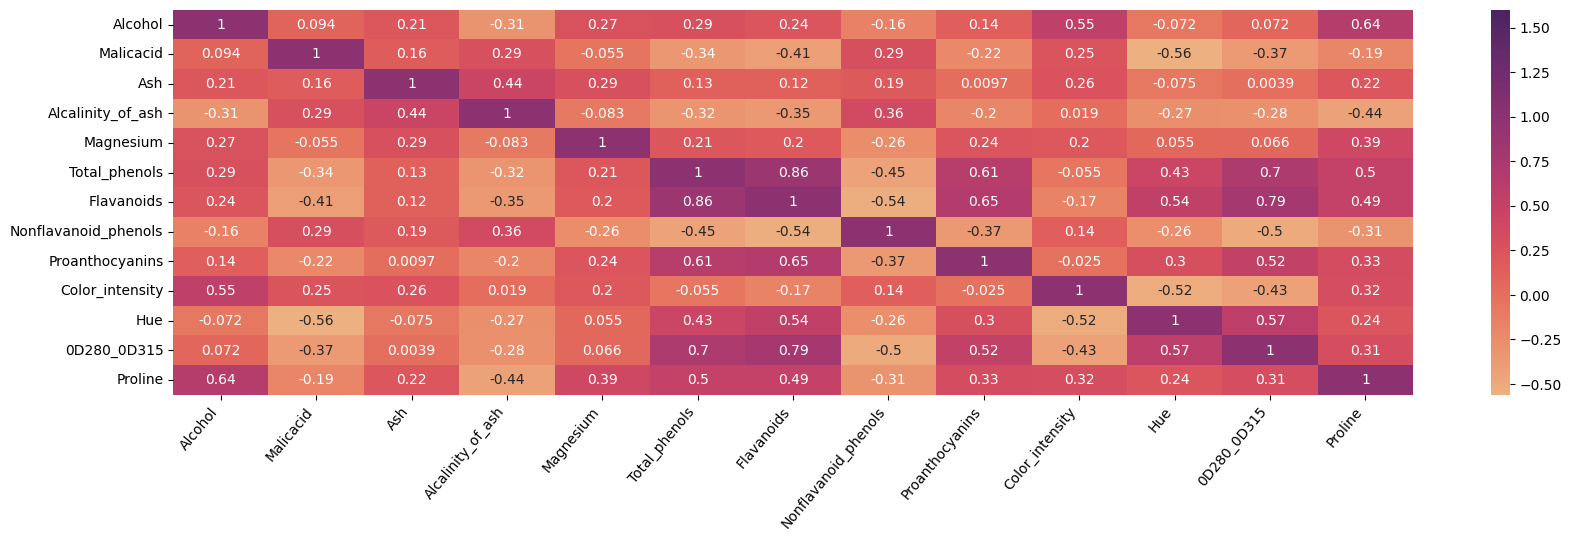

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(X.corr(),cmap = sns.color_palette("flare", as_cmap=True),annot = True,vmax = 1.6);
plt.xticks(rotation=50, ha='right');

## Распределение данных

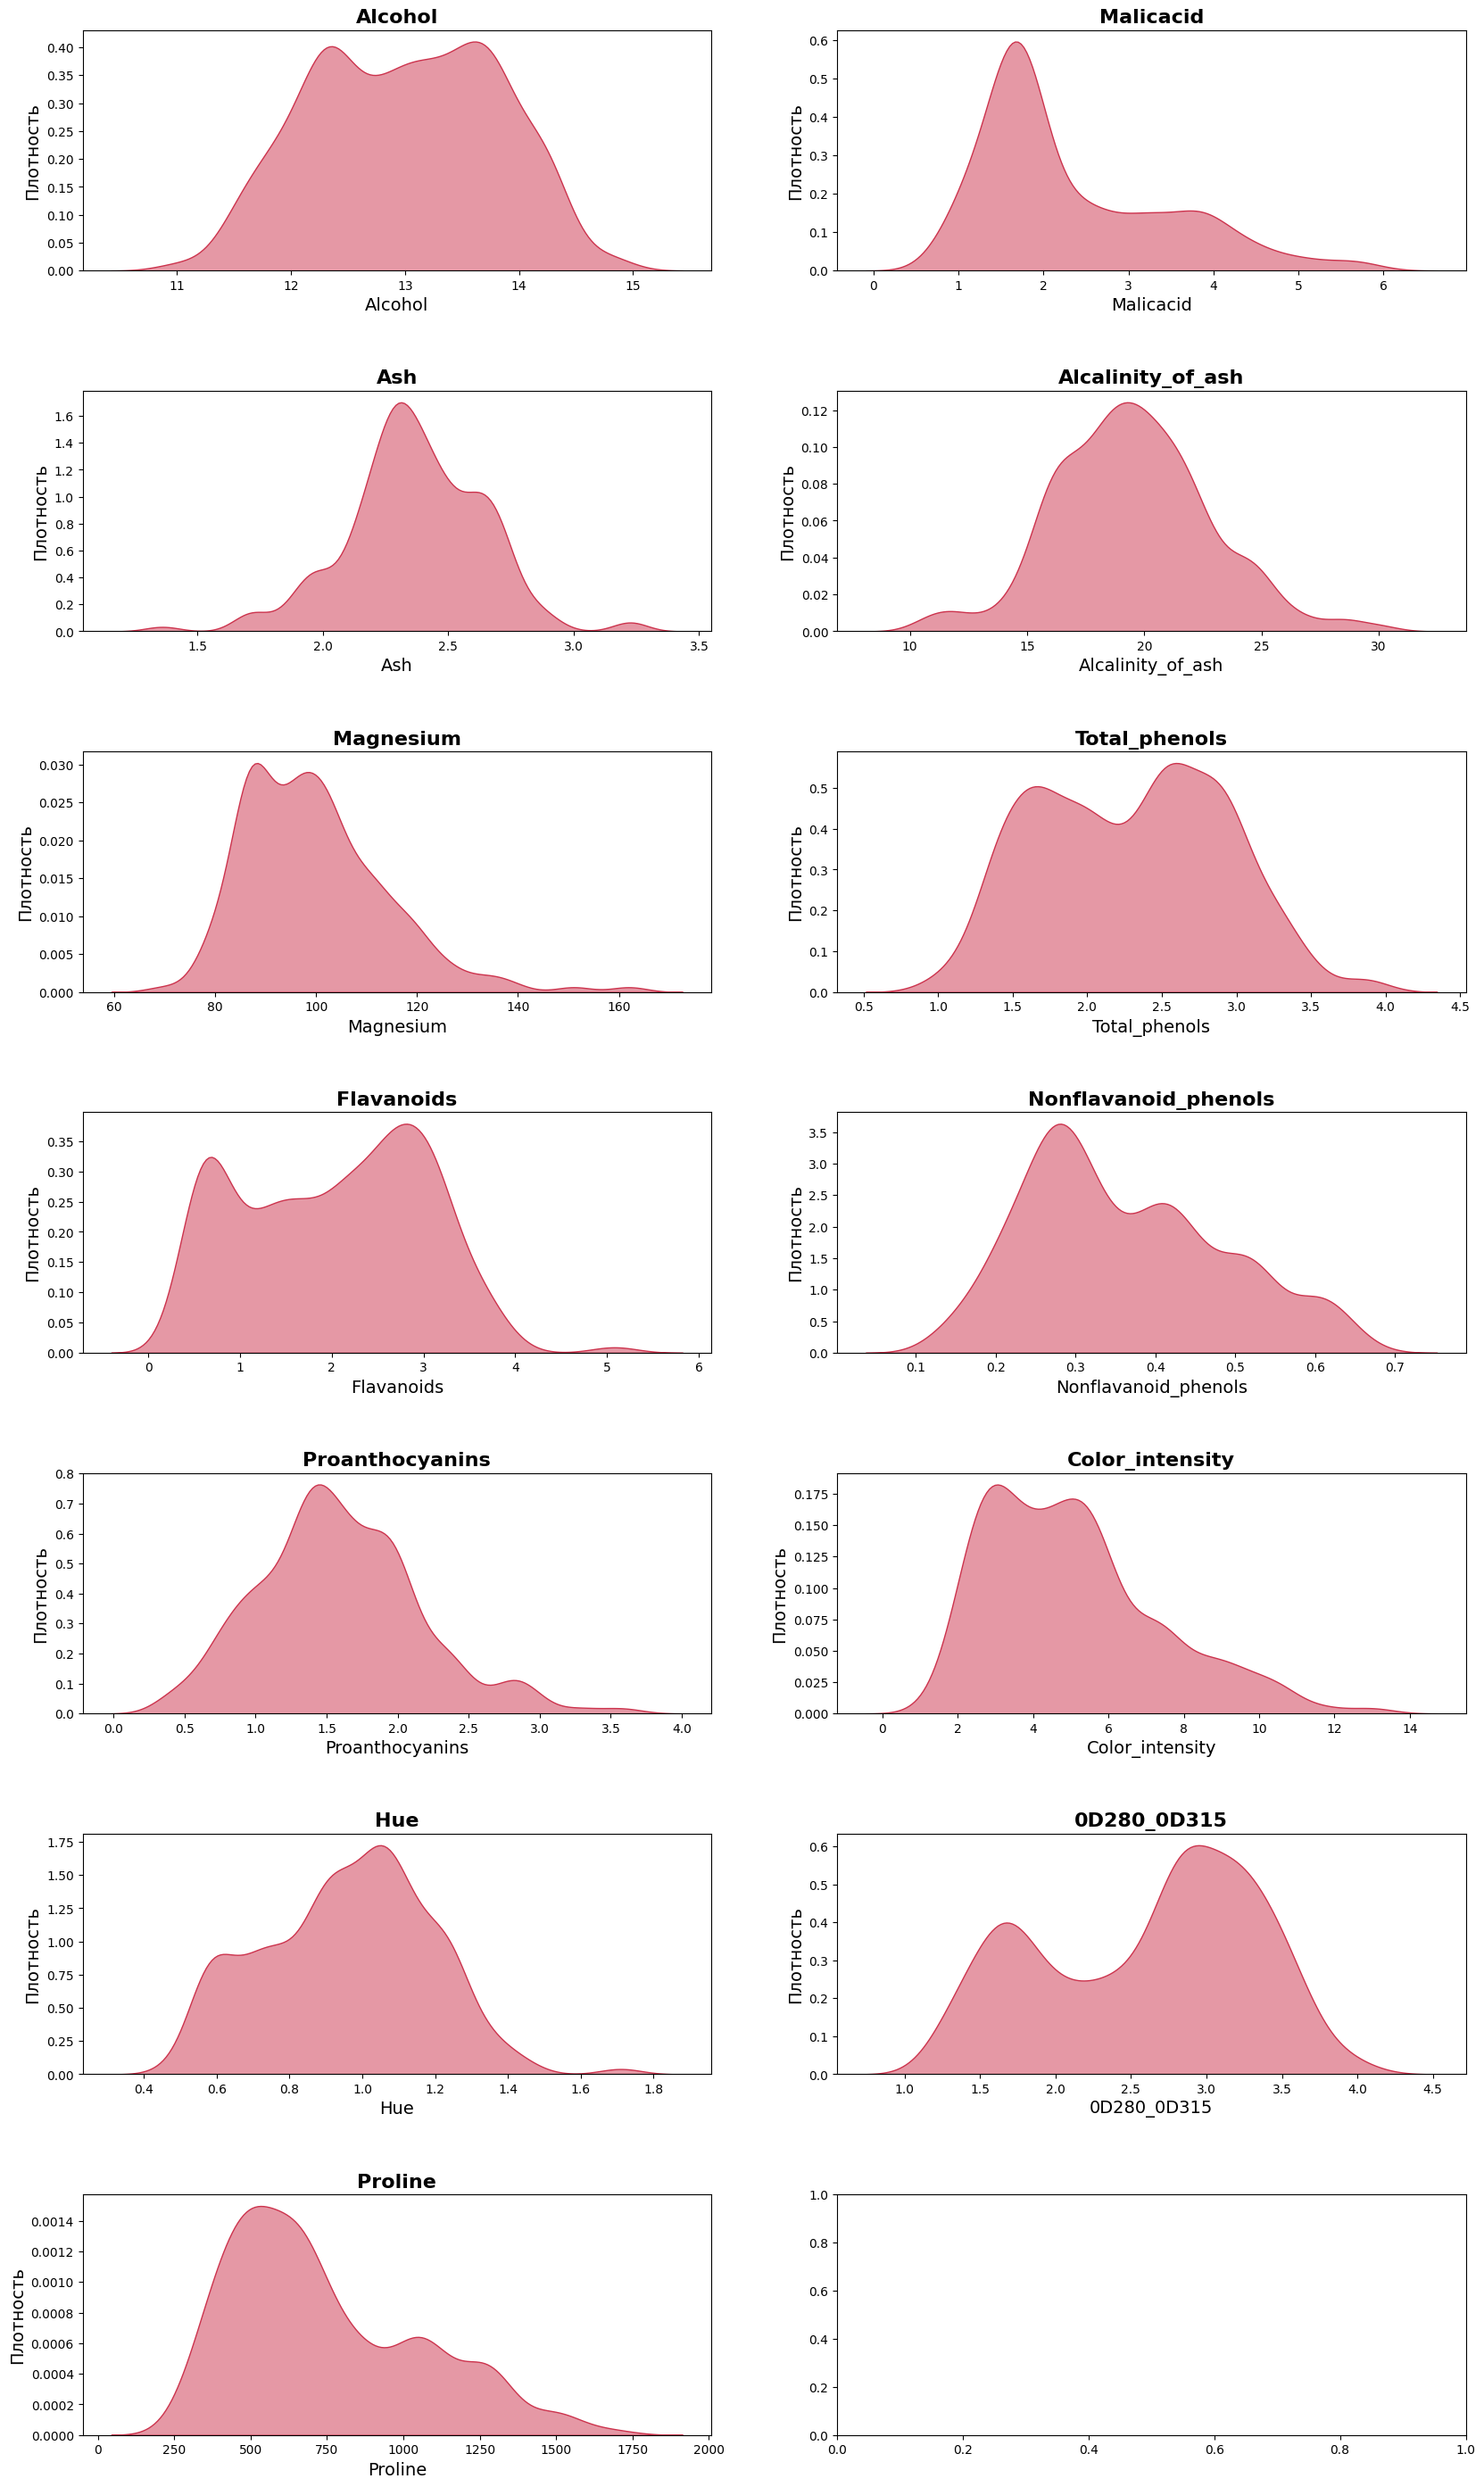

In [ ]:
# Создаем матрицу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(7,2, figsize = (20,35))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Список значений признаков для цикла
columns = X.columns

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = X,
                x = column,
                fill = True,
                alpha = 0.5,
                bw_adjust=.7,
                color = [0.8, 0.2, 0.3],
                ax = ax)

    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Плотность', fontsize = 14)


plt.show()

<ul>
<li>  Некоторые признаки близки к нормальному распределению (Proanthocyanins, Alcalinity_of_ash)</li>
<li> Остальные признаки имеют скос или несколько мод (в основном 2)</li>
<li> Явновыраженных выбросов не обнаружено</li>
<li> Признаки имеют разные масштабы измерений. Есть и сходство, но в основном различие на порядок, а в некоторых случаях даже на 2</li>
</ul>

## Масштабирование


Из того, что большинство признаков имеют отличное от нормального распределение, следует, что стандартизация не лучший вариант. Вместно нее лучше подойдет MinMax.

In [ ]:
mms = MinMaxScaler()
X=pd.DataFrame(mms.fit_transform(X), columns=X.columns)

# Задание 2  
Цель: Снижение размерности с помощью PCA и t-SNE
- Проанализируйте данные о вине с помощью анализа главных компонент (PCA) и t-SNE.
- Визуализируйте данные в 2D-пространстве с помощью t-SNE, используя разные значения гиперпараметров.

## Метод главных компонет


Метод главных компонент может быть полезен в задаче классификации при большом количестве признаков, так как значительно улучшает результаты работы ансамблевых методов. Однако в данном случае решается задача кластеризация, где всего 13 признаков, поэтому он будет использоваться только для упрощения восприятия данных в виде двумерного и трехмерного графиков.

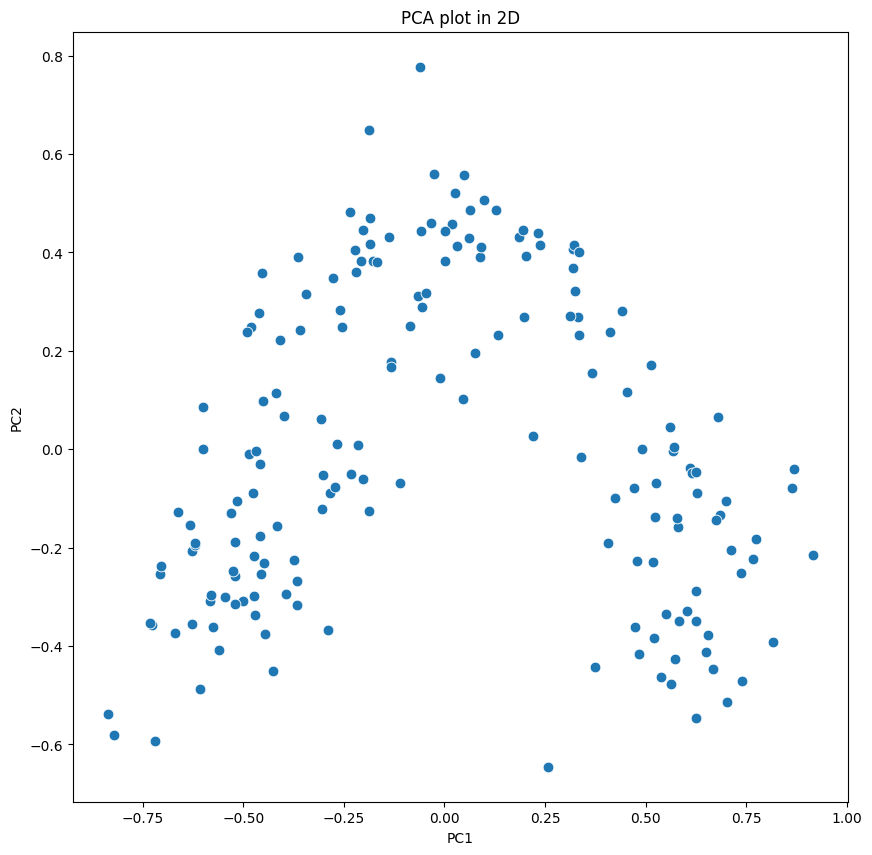

In [ ]:
principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))

fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0],
                y = principal_df.iloc[:,1],
                s=60)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

In [ ]:
def TSNEplot(pred=None):
    tsne = TSNE(random_state=1)

    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(12, 10))
    plt.scatter(X_tsne[:, 0],
                X_tsne[:, 1],
                c = pred,
                edgecolor="none",
                alpha=0.7, s=40,
        cmap=plt.cm.get_cmap("flare", 3))

    plt.colorbar()
    plt.title("t-SNE projection");

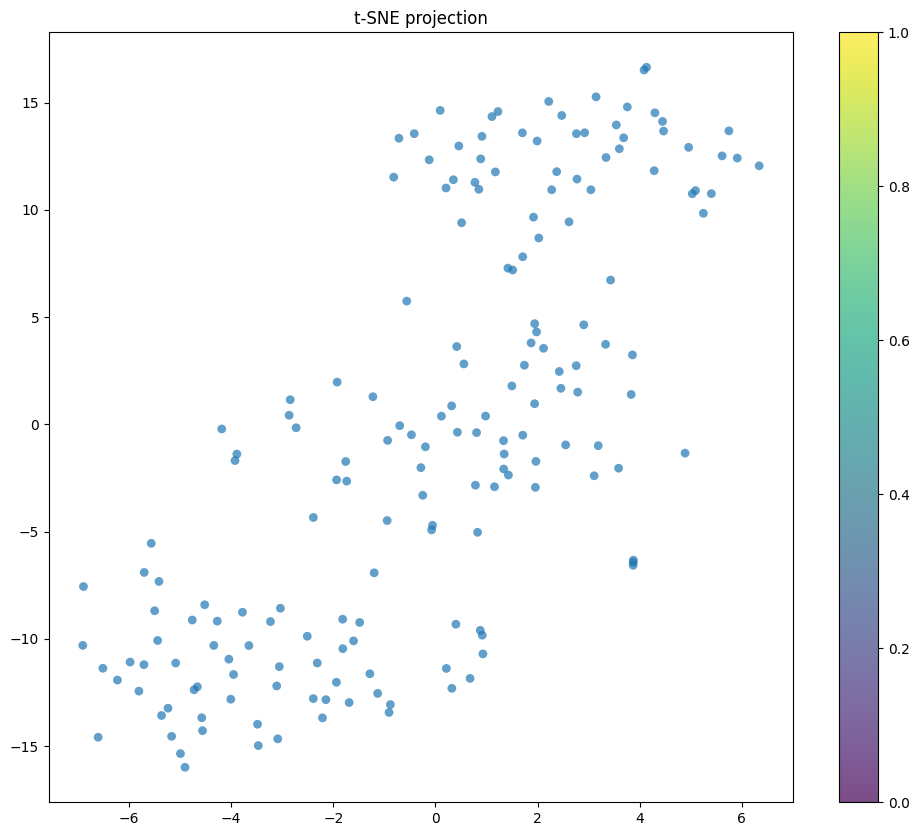

In [ ]:
TSNEplot()

In [ ]:
def PCAplot3D(x_data, y_data=None):
    components = PCA(n_components=3).fit_transform(x_data)

    fig = px.scatter_3d(
        components,
        x=0, y=1, z=2,
        color=y_data,
        size=0.1*np.ones(len(X)),
        opacity = 1,
        title='PCA plot in 3D',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
        width=900, height=900
    )
    fig.show()

In [ ]:
PCAplot3D(X)

### Выбор метода кластеризации


Кластеризация ассоциируется с методом k-средних. Однако он не являтся единственным, только в библиотеке scikit-learn представлено 11 методов, некоторые из них могут решать общие задачи, другие - лучше справятся с определенным типом.


В данном случае известно следующее:
<ul>
<li> Набор данных разбит на 3 класса </li>
<li> Количество данных не слишком велико</li>
<li> При визуальном осмотре можно выделить 3 кластера </li>
<li> Проекция на плоскость имеет достаточно большую дисперсию</li>
</ul>

Выбор пал на методы K-Means, Spectral Clustering, DBSCAN и Agglomerative Clustering by Ward. Главным параметром у них является число кластеров, а на графике распределения, схожим с нашим, методы демонстрируют достаточно хорошую работу.

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png">

# Задание 3

Кластеризация данных с помощью K-Means:

* Примените алгоритм K-Means для кластеризации данных о вине.
* Оптимизируйте количество кластеров (k) с помощью метода локтя
* Визуализируйте результат кластеризации, используя методы понижения размерности t-SNE и PCA
* Проанализируйте характеристики вин в каждом кластере.

## K-Means

In [ ]:
pca = PCA(n_components=2)

kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(X)
centroids_pca = pca.fit_transform(kmeans.cluster_centers_)
pred_k = kmeans.labels_

principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))

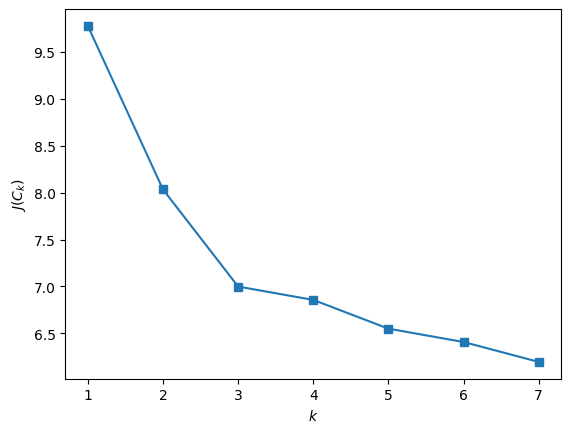

In [ ]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto').fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$");

In [ ]:
pca = PCA(n_components=2)


kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(X)
centroids_pca = pca.fit_transform(kmeans.cluster_centers_)
pred_k = kmeans.labels_

principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))

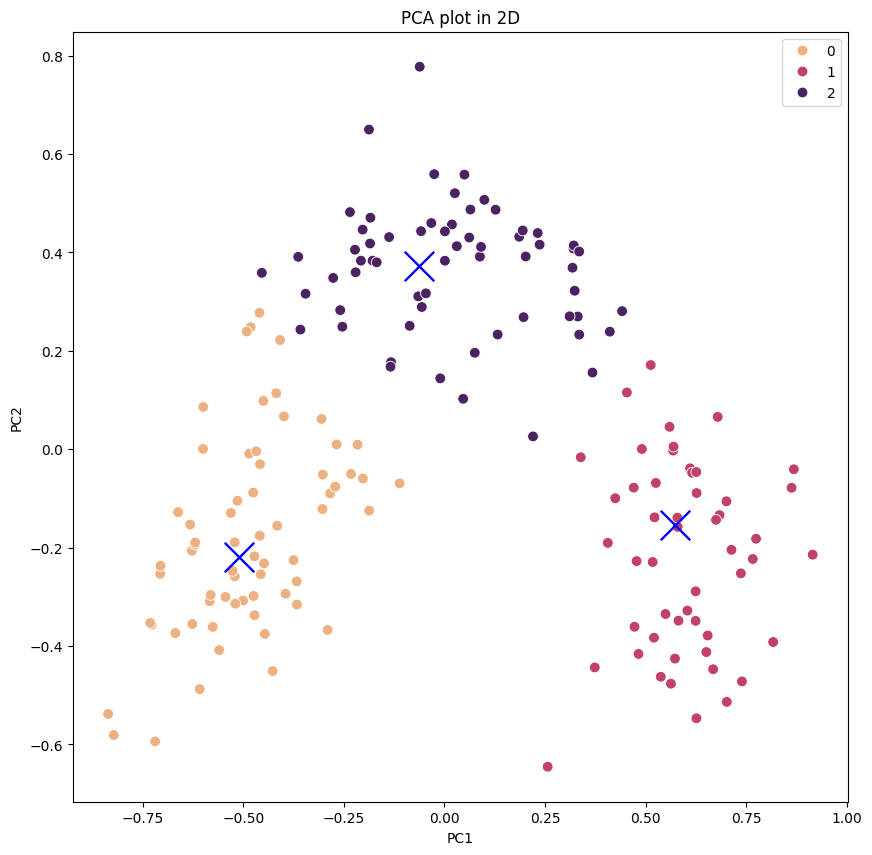

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0],
                y = principal_df.iloc[:,1],
                hue = pred_k,
                palette="flare",
                s=60)
sns.scatterplot(x = centroids_pca[:,0],
                y =  centroids_pca[:,1],
                marker="x",
                s=450,
                color = 'blue')
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

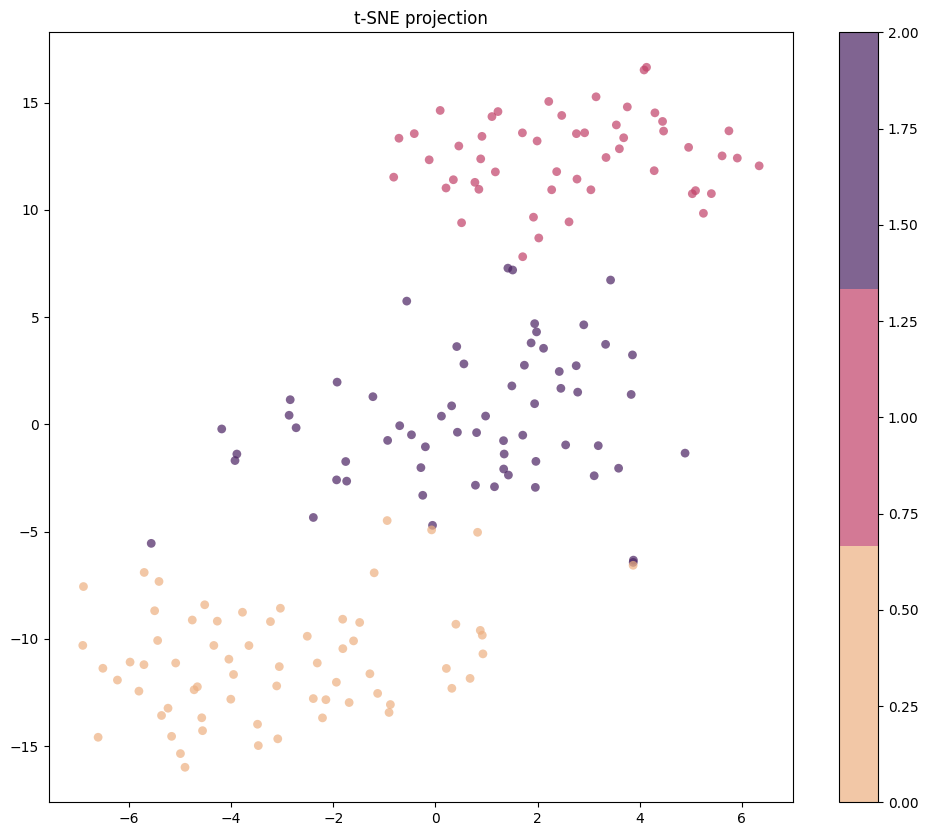

In [ ]:
TSNEplot(pred_k)

In [ ]:
PCAplot3D(X, pred_k)

silhouette - оценка сходства между объектами внутри одного кластера и различия между кластерами,то есть,  на сколько близки объекты в одном кластере (среднее расстояние от объекта до других объектов в этом же кластере (значение a в формуле) и среднее расстояние от объекта до других объектов в других кластераъ (значение b в формуле) по отношению к максимальному числу среди данных двух чисел)
    
variance ration criterion - отношение межкластерной дисперсии (сумма квадратов расстояний между центроидами кластеров и общим центроидом) и отношение внутрикластерной дисперсии (сумма квадратов расстояний от каждой точки до своего центроида кластера)

In [ ]:
silhouette = silhouette_score(X, pred_k)
chi = calinski_harabasz_score(X, pred_k)
print('\nK-Means')
print('_'*45 + '\n')
print('Силуэт', round(silhouette,3))
print('Variance Rarion Criterion', round(chi,3))
rs_k = rand_score(kmeans.labels_, y)
print(" rand_score = {} \n\n {} из 178 предсказано верно \n".format(rs_k, rs_k * 178))


K-Means
_____________________________________________

Силуэт 0.3
Variance Rarion Criterion 83.264
 rand_score = 0.9318225099980956 

 165.864406779661 из 178 предсказано верно 



Silhouette 0.3:

* Значение силуэта 0,3 указывает на умеренную кластеризацию. Это значит, что кластеры имеют перекрытия.

Variance Rarion Criterion 83.264:

* Значение Variance Rarion Criterion 83,264 указывает на умеренную дисперсию кластеров. Это значит, что кластеры достаточно компактны.

Rand Score 0,9318:

* Rand Score 0,9318 говорит о том, что 93.18% объектов правильно предсказаны кластерами. Это довольно высокая оценка.

165.864406779661 из 178 предсказано верно:

* Около 92.9% объектов правильно предсказаны. Это подтверждает высокую точность кластеризации.

### Построим распределения по каждому кластеру

In [ ]:
df_cluster = df.copy()
df_cluster['K-Means'] = pred_k

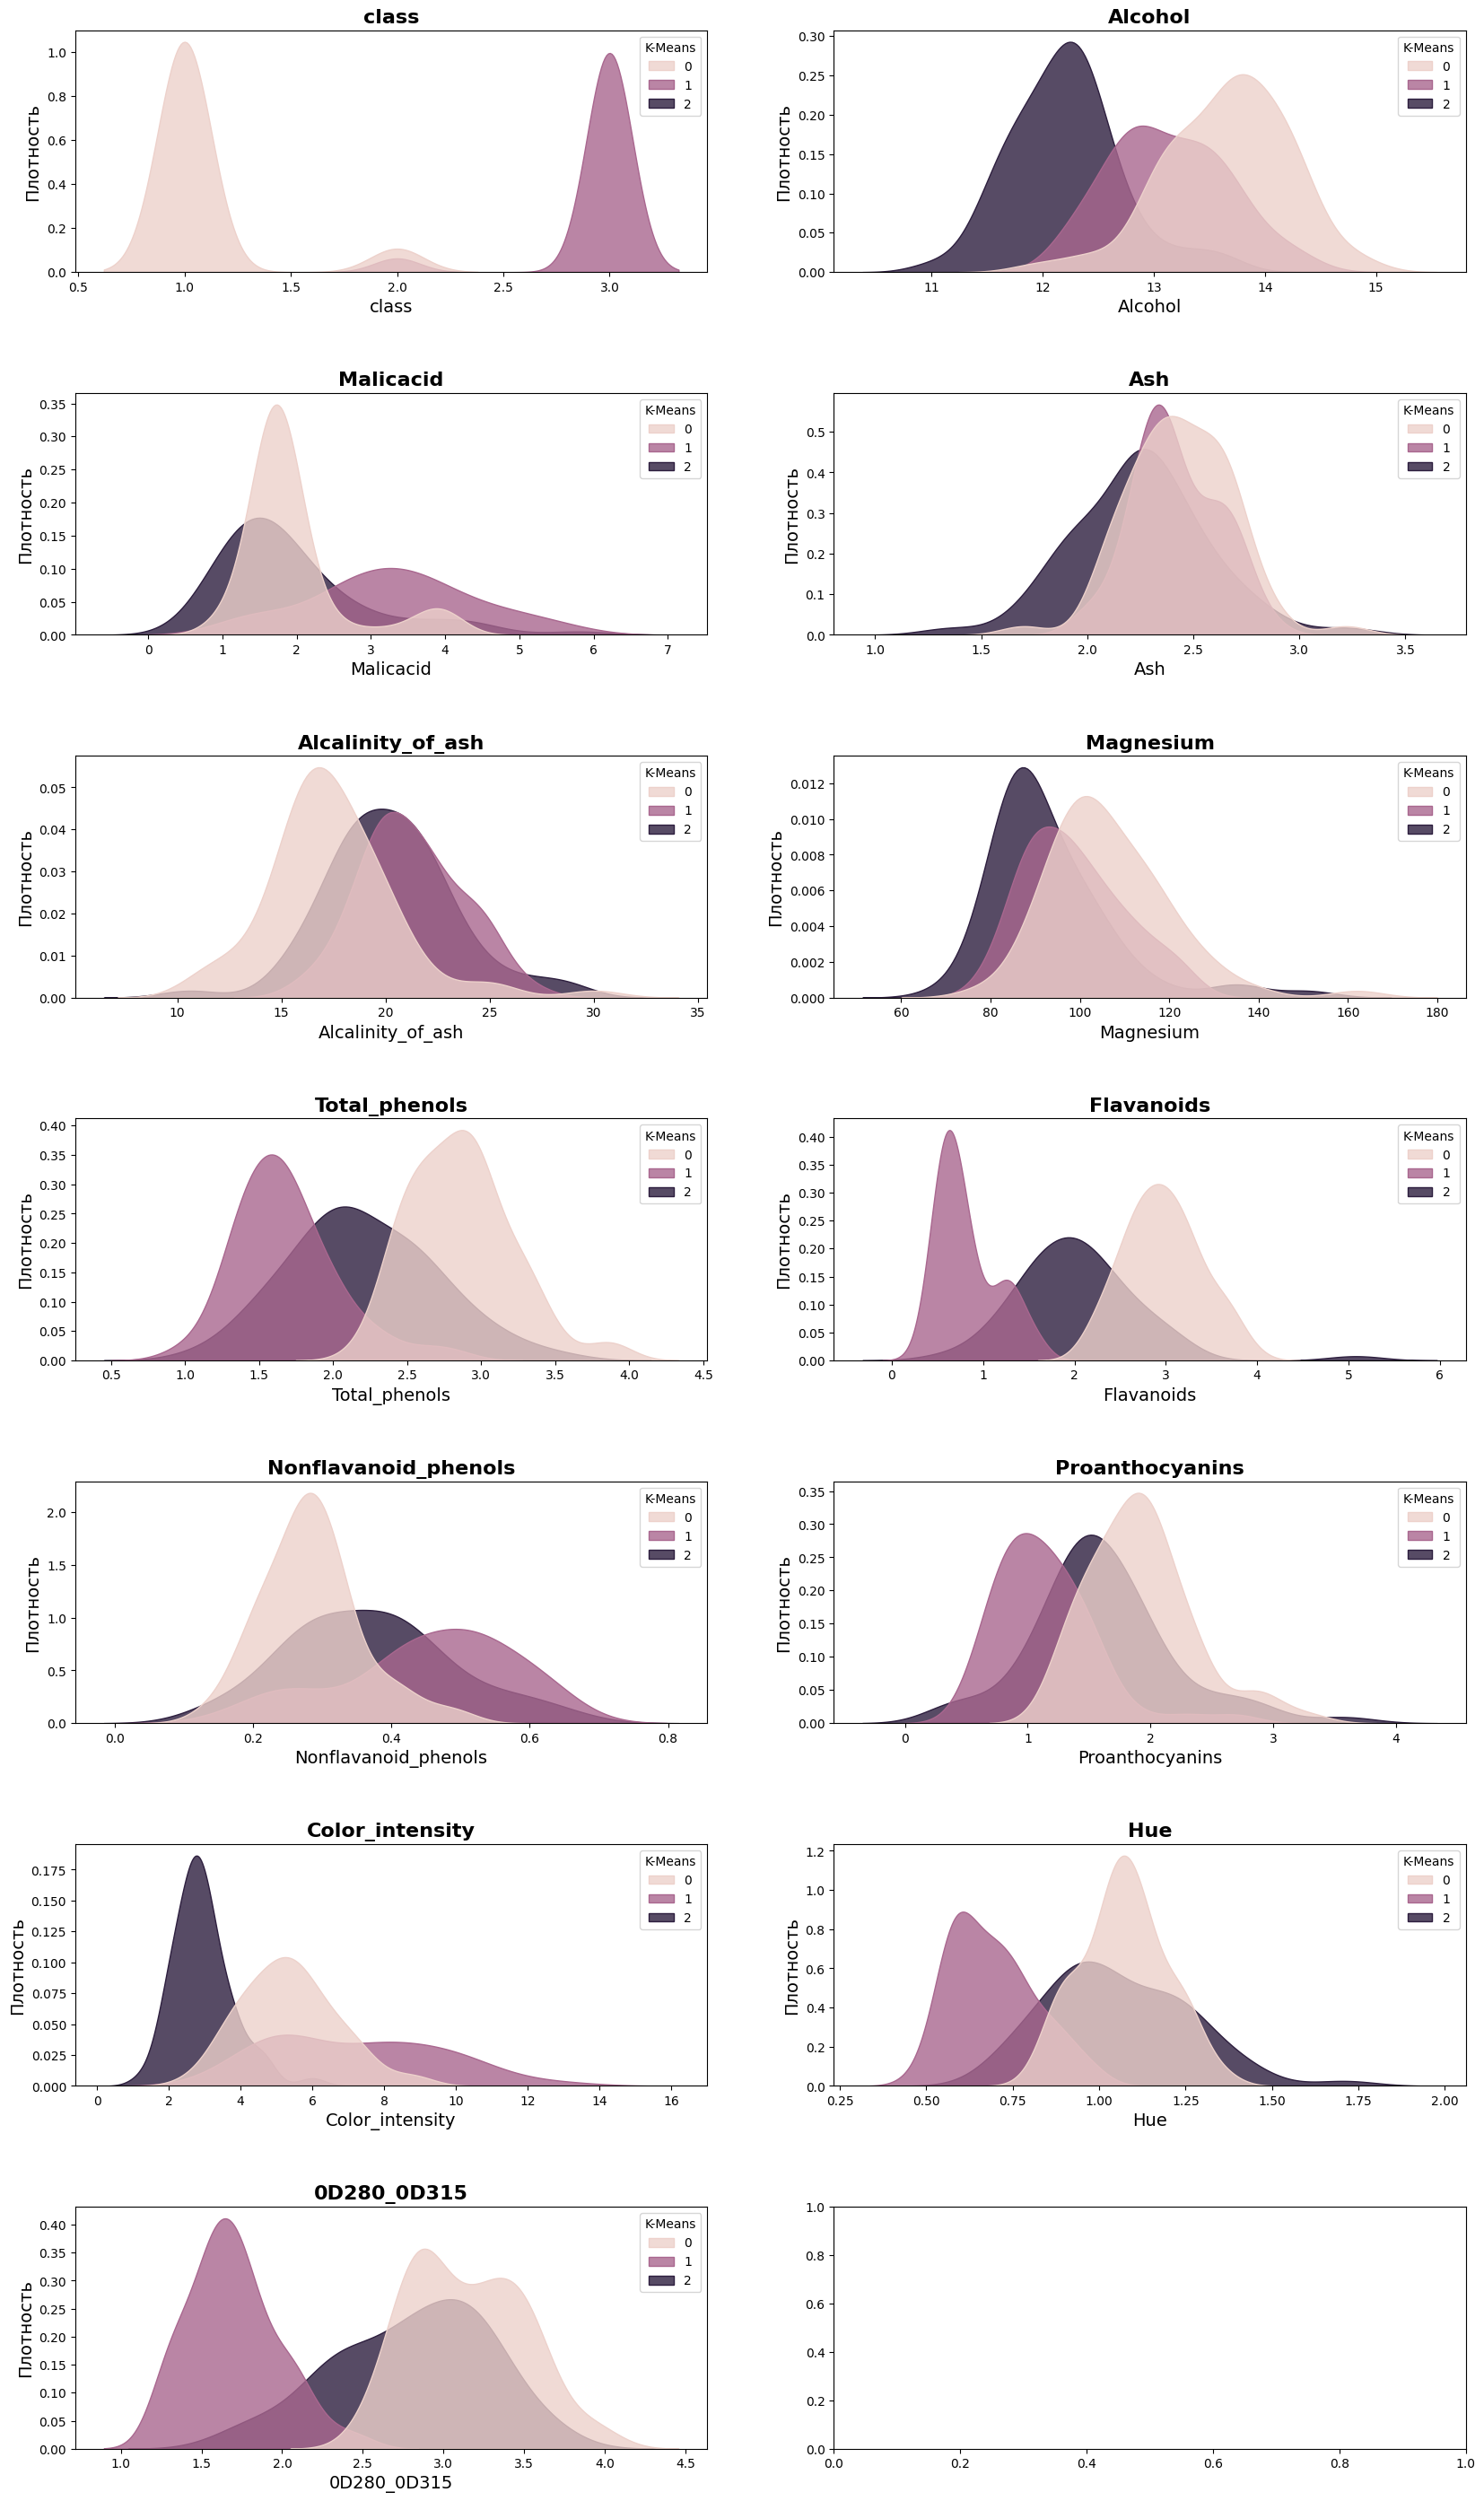

In [ ]:
# Создаем матрицу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(7,2, figsize = (20,35))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Список значений признаков для цикла
columns = df.columns[:-1]

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = df_cluster,
                x = column,
                fill = True,
                alpha = 0.8,
                hue = 'K-Means',
                ax = ax)

    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Плотность', fontsize = 14)


plt.show()

1. Можно четко выделить различия между кластерами по колонке Alcohol  
Например в 0 классе вина преобладает значения алкоголя равное 12  
В 1 классе вину преобладает значение алкоголя равное 13 (что больше чем в 0 классе)  
В 2 классе вину преобладает значение алкоголя равное 14 (что больше чем в 1 классе)
        
То есть можно сделать вывод  по данному графику, что в данном наборе данных существует 3 категории вина, с разным содержанием алкоголя
    
2. Так же существуют различия между классаии в признаке total_phenols
   в 0 классе меньше всего
  во 2 клаасе - это значение больше всего
    
3. Flavanoids  
  в 0 классе преобладает значение 0,5  
  в 1 классе преобладает значение 2  
  во 2 классе преобладает значение 3
    
В целом по каждому признаку есть небольшие отличия между тремя классами вина
    
    
Составим типовой портрет каждого класса вина
    
    
для 0 класса вино будет следующим:
    
    содержание 'Alcohol' 12
    'Malic_Acid' низкое (в диапазоне от 0 до 3)
    'Magnesium' низкое (до 80 до 100)
    'Total_Phenols' 2
    'Flavanoids' 2
    'Color_Intensity' низкое (то есть цвет менее насыщенный относительно других вин)
    Значение в диапазоне от 0 до 3
    'Proline' низакое (в диапазоне от 250 до 500)
    
Так же можно посмотреть и другие зарактеристика других вин, что можно сделать самостоятельно

# Задание 4
Цель: Исследование разных алгоритмов кластеризации
* Примените алгоритм иерархической кластеризации с методом связывания Уорда.
* Примените алгоритм Спектральной кластеризации для кластеризации данных о вине.
* Примените алгоритм DBSCAN для кластеризации данных о вине.
* Визуализируйте данные в 2D-пространстве с помощью t-SNE и PCA
* Посчитайте метрики и сделайте выводы о каждом из алгоритмов.

## Agglomerative Clustering by Ward

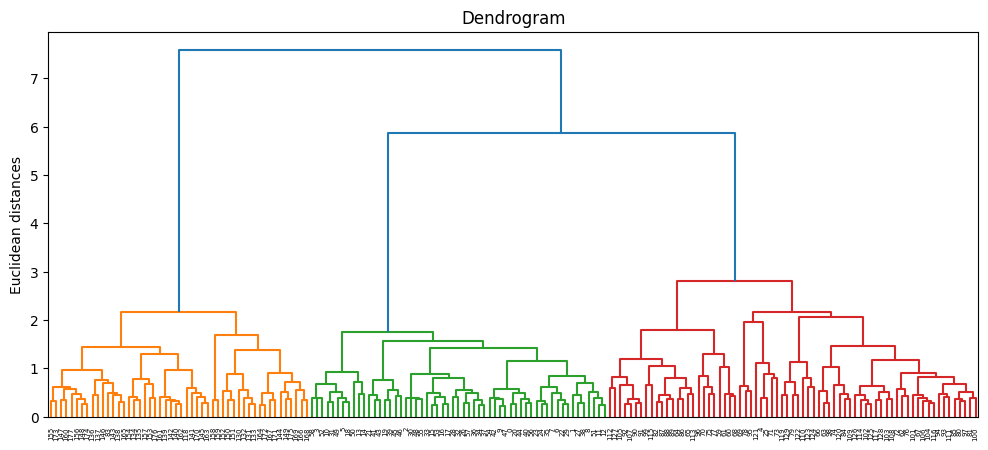

In [ ]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

Мы построили дендрограмму для определения количества кластеров в данном наборе данных.
    Использовали библиотеку scipy
    Как видно из данной  дендрограммы то лучше всего делить данный набор данных на 3 кластера (то есть определить 3 клааса)
    Так же можно более подробно проанализировать какие объекты ближе всего и какие объединялись последовательно (то есть расписать и проанализировать порядок объединения)
    
    При построении данной дендрограммы мы использовали метод 'ward'. Это не единственный метод, для определения расстояния между кластерами. Так же существуют и другие
    Например:
    
    1. single -  Расстояние между кластерами определяется как минимальное расстояние между одним объектом в одном кластере и другим объектом в другом кластере. Этот метод склонен к формированию длинных цепочек кластеров. Иными словами, два кластера считаются ближайшими, если ближайшие к ним объекты расположены на минимальном расстоянии друг от друга.
    
    2. complete - Расстояние между кластерами определяется как максимальное расстояние между объектами в кластерах. Этот метод склонен к формированию компактных, крупных кластеров.  Иными словами, два кластера считаются ближайшими, если самые далекие объекты в этих кластерах находятся на минимальном расстоянии друг от друга.
    
    3. average - Расстояние между кластерами определяется как среднее расстояние между всеми парами объектов из двух кластеров. Этот метод стремится к балансу между методами одиночной и полной связи.
    
    4. ward - Этот метод стремится минимизировать увеличение общего within-cluster variance после объединения кластеров. Он склонен формировать кластеры с более однородной дисперсией внутри кластера. (минимизировать сумму квадратов отклонений (within-cluster variance) внутри кластеров после объединения.)
    
    Здесь мы используем метод ward так как нам надо что бы дисперсия в одной группе была минимальна (то есть объекты были похожи друг на друга), следовательно так как ward измеряет дисперсию,то мы и используем этот метод

In [ ]:
clustering_ward = AgglomerativeClustering(3).fit(X)
pred_ward = clustering_ward.labels_

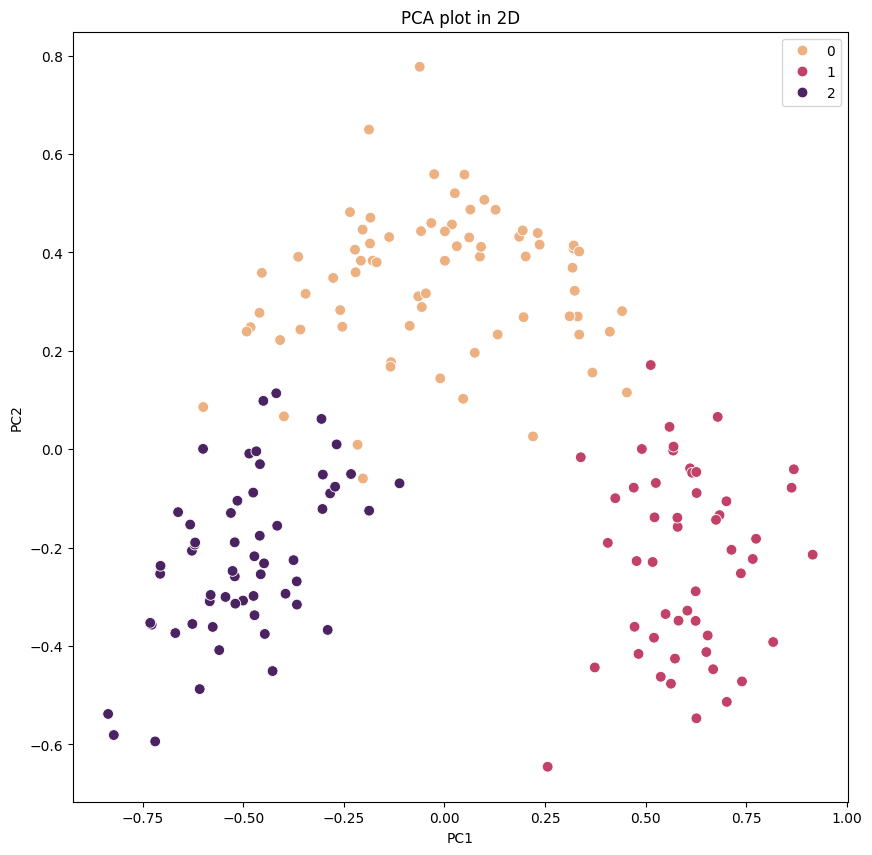

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0],
                y = principal_df.iloc[:,1],
                hue = pred_ward,
                palette="flare",
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

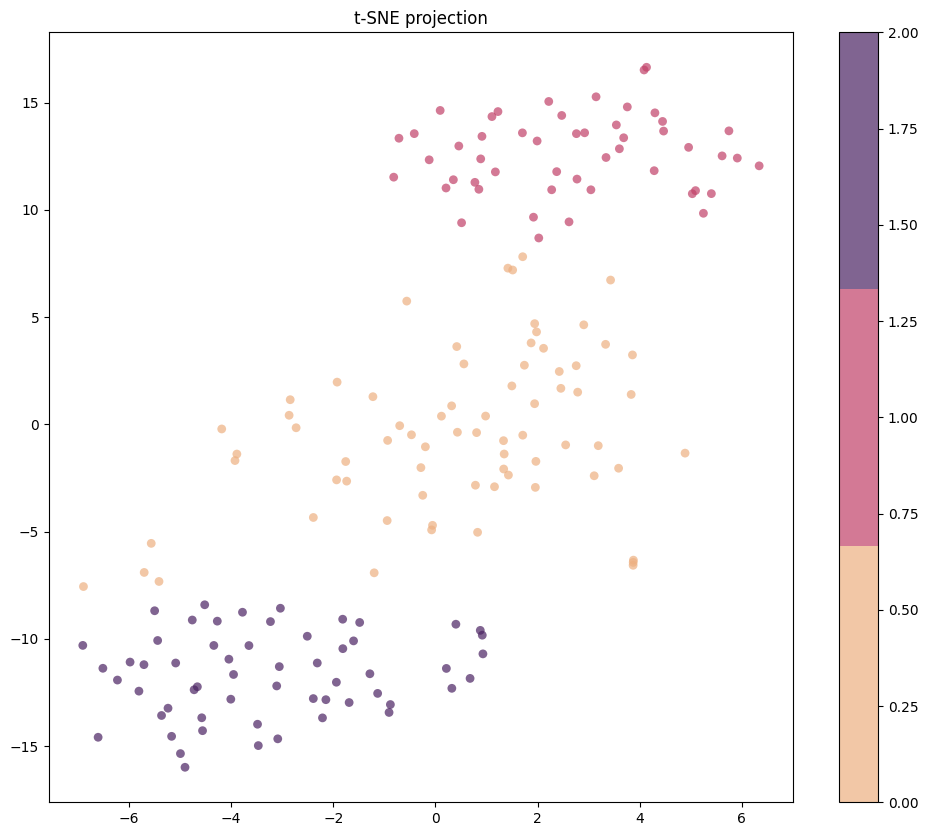

In [ ]:
TSNEplot(pred_ward)

In [ ]:
PCAplot3D(X, pred_ward)

In [ ]:
silhouette = silhouette_score(X, pred_ward)
chi = calinski_harabasz_score(X, pred_ward)
print('Agglomerative Clustering')
print('_'*45 + '\n')
print('Силуэт', round(silhouette,3))
print('Variance Rarion Criterion', round(chi,3))
rs_ward = rand_score(pred_ward, y)
print(" rand_score = {} \n\n {} из 178 предсказано верно \n".format(rs_ward, rs_ward * 178))

Agglomerative Clustering
_____________________________________________

Силуэт 0.295
Variance Rarion Criterion 81.328
 rand_score = 0.9691487335745572 

 172.5084745762712 из 178 предсказано верно 



In [ ]:
df_cluster['Agglomerative'] = pred_ward

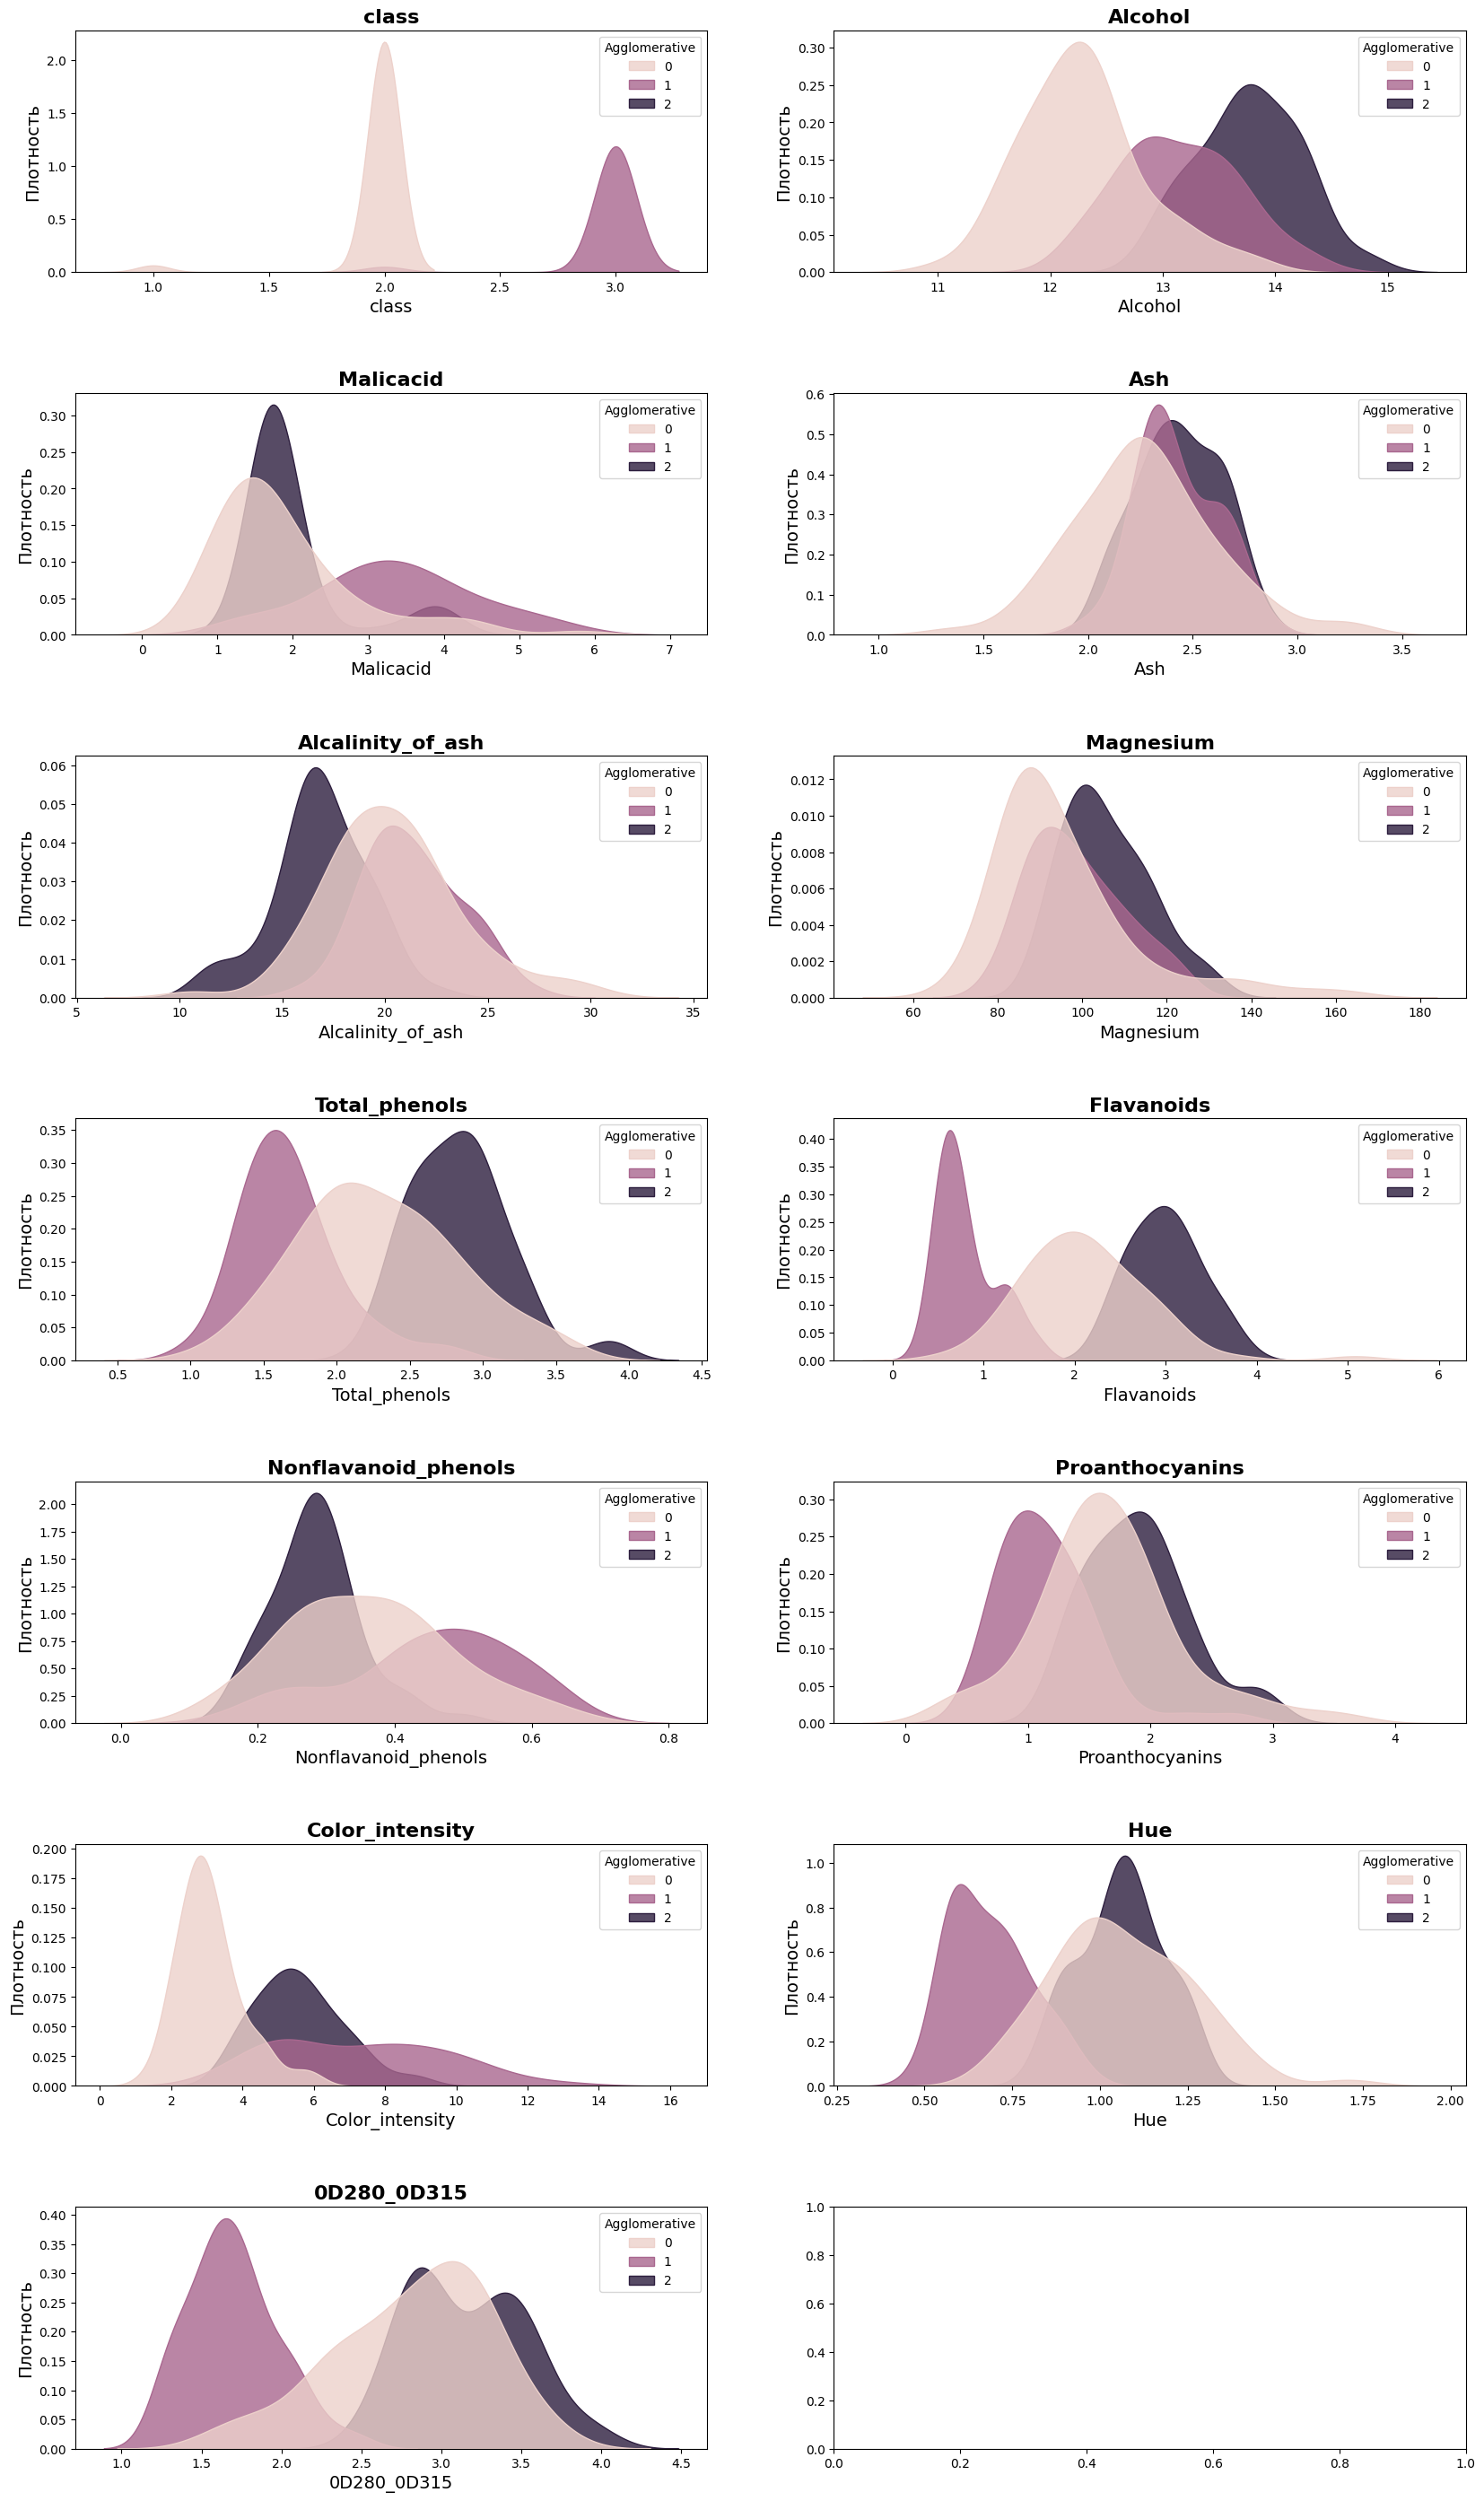

In [ ]:
# Создаем матрицу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(7,2, figsize = (20,35))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Список значений признаков для цикла
columns = df.columns[:-1]

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = df_cluster,
                x = column,
                fill = True,
                alpha = 0.8,
                hue = 'Agglomerative',
                ax = ax)

    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Плотность', fontsize = 14)


plt.show()

## Spectral Clustering

In [ ]:
clustering_sp = SpectralClustering(3).fit(X)
pred_sp = clustering_sp.labels_

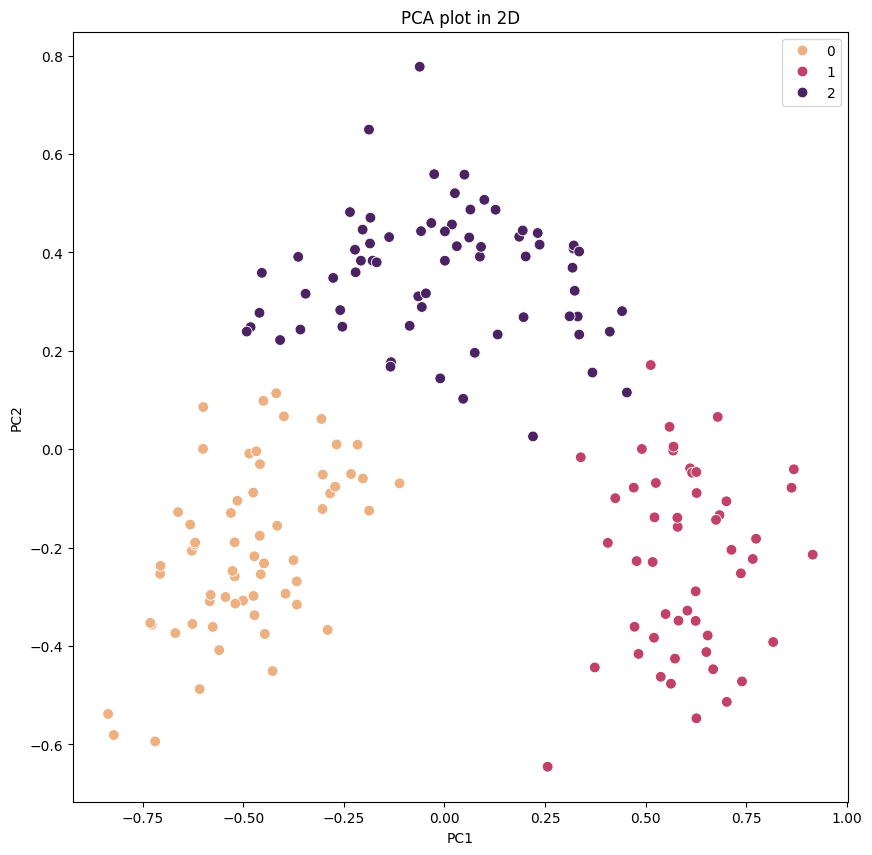

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0],
                y = principal_df.iloc[:,1],
                hue = pred_sp,
                palette="flare",
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

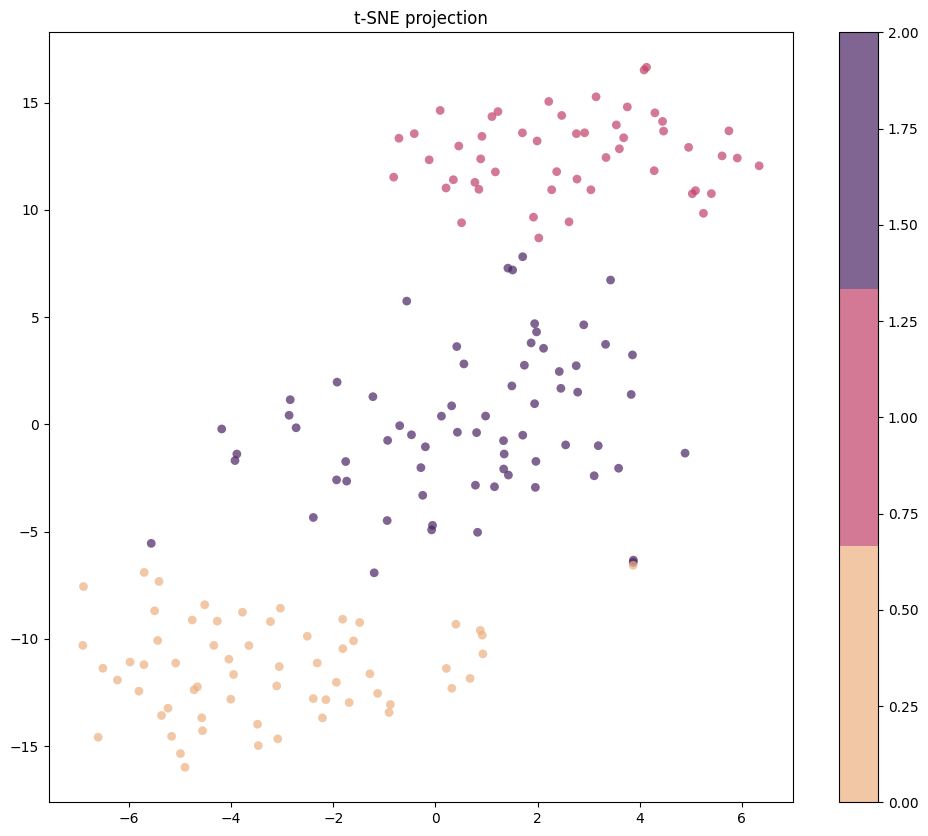

In [ ]:
TSNEplot(pred_sp)

In [ ]:
PCAplot3D(X, pred_sp)

In [ ]:
silhouette = silhouette_score(X, pred_sp)
chi = calinski_harabasz_score(X, pred_sp)
print('Spectral Clustering')
print('_'*45 + '\n')
print('Силуэт', round(silhouette,3))
print('Variance Rarion Criterion', round(chi,3))
rs_sp = rand_score(pred_sp, y)
print(" rand_score = {} \n\n {} из 178 предсказано верно \n".format(rs_sp, rs_sp * 178))

Spectral Clustering
_____________________________________________

Силуэт 0.3
Variance Rarion Criterion 82.828
 rand_score = 0.9691487335745572 

 172.5084745762712 из 178 предсказано верно 



In [ ]:
df_cluster['Spectral'] = pred_sp

## DBSCAN

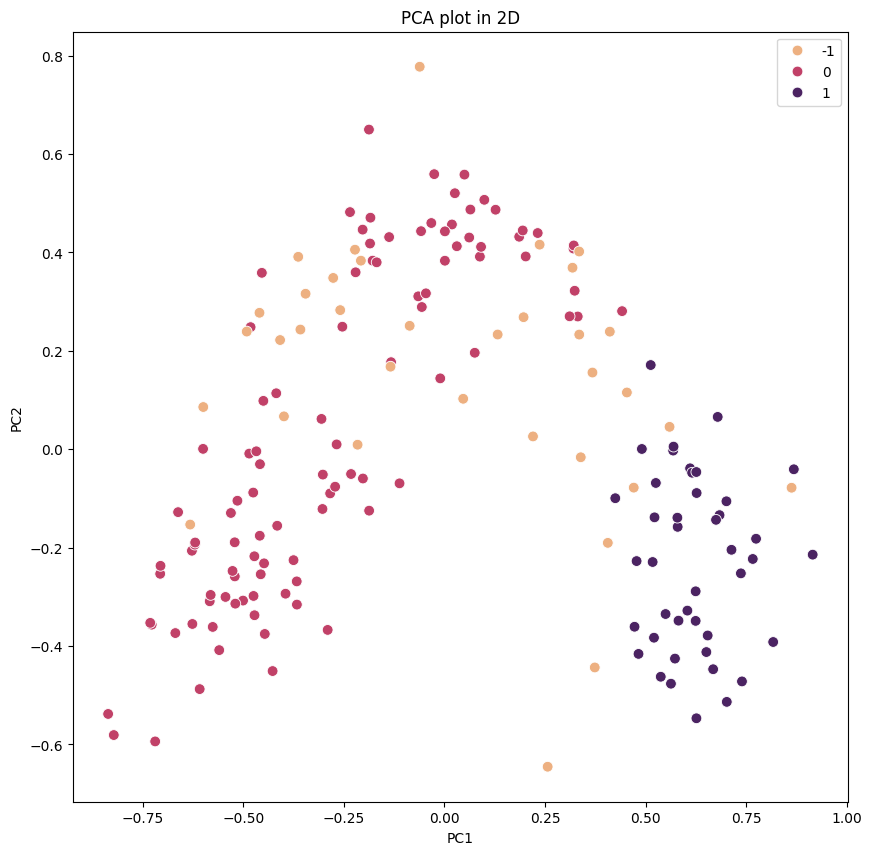

In [ ]:
from sklearn.cluster import DBSCAN
clustering_db = DBSCAN(eps=0.5, min_samples=10).fit(X)
pred_db = clustering_db.labels_
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0],
                y = principal_df.iloc[:,1],
                hue = pred_db,
                palette="flare",
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

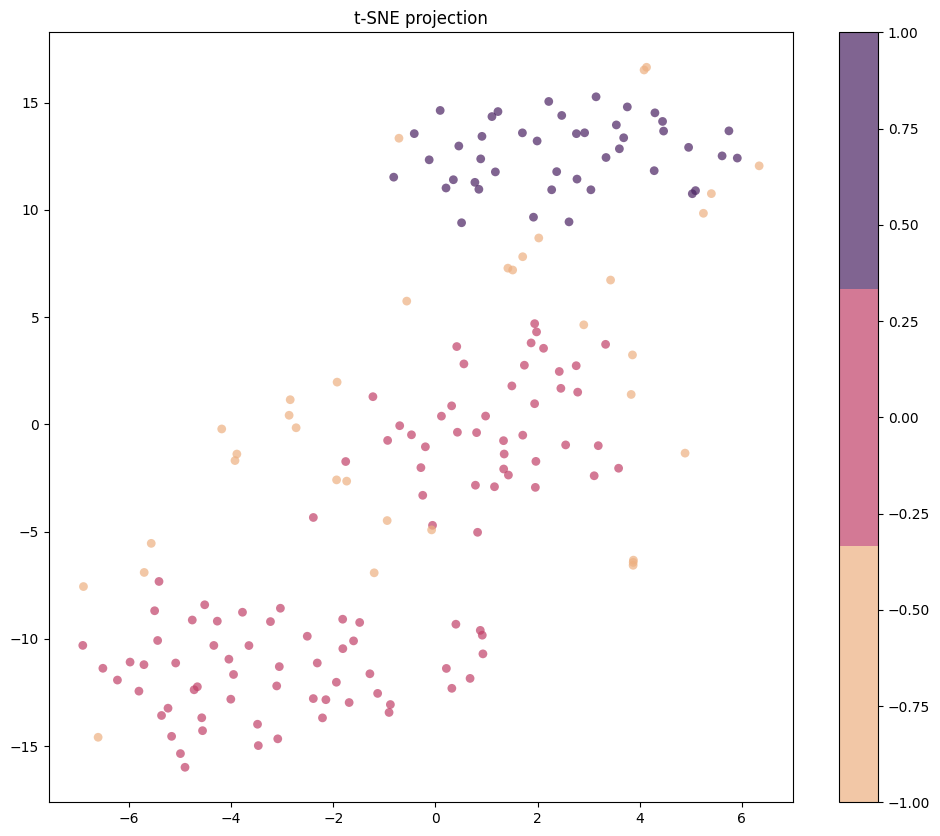

In [ ]:
TSNEplot(pred_db)

In [ ]:
PCAplot3D(X, pred_db)

In [ ]:
silhouette = silhouette_score(X, pred_db)
chi = calinski_harabasz_score(X, pred_db)
print('DBSCAN')
print('_'*45 + '\n')
print('Силуэт', round(silhouette,3))
print('Variance Rarion Criterion', round(chi,3))
rs_db = rand_score(pred_db, y)
print(" rand_score = {} \n\n {} из 178 предсказано верно \n".format(rs_db, rs_db * 178))

DBSCAN
_____________________________________________

Силуэт 0.204
Variance Rarion Criterion 38.013
 rand_score = 0.7182758839586111 

 127.85310734463278 из 178 предсказано верно 



In [ ]:
df_cluster['DBSCAN'] = pred_db

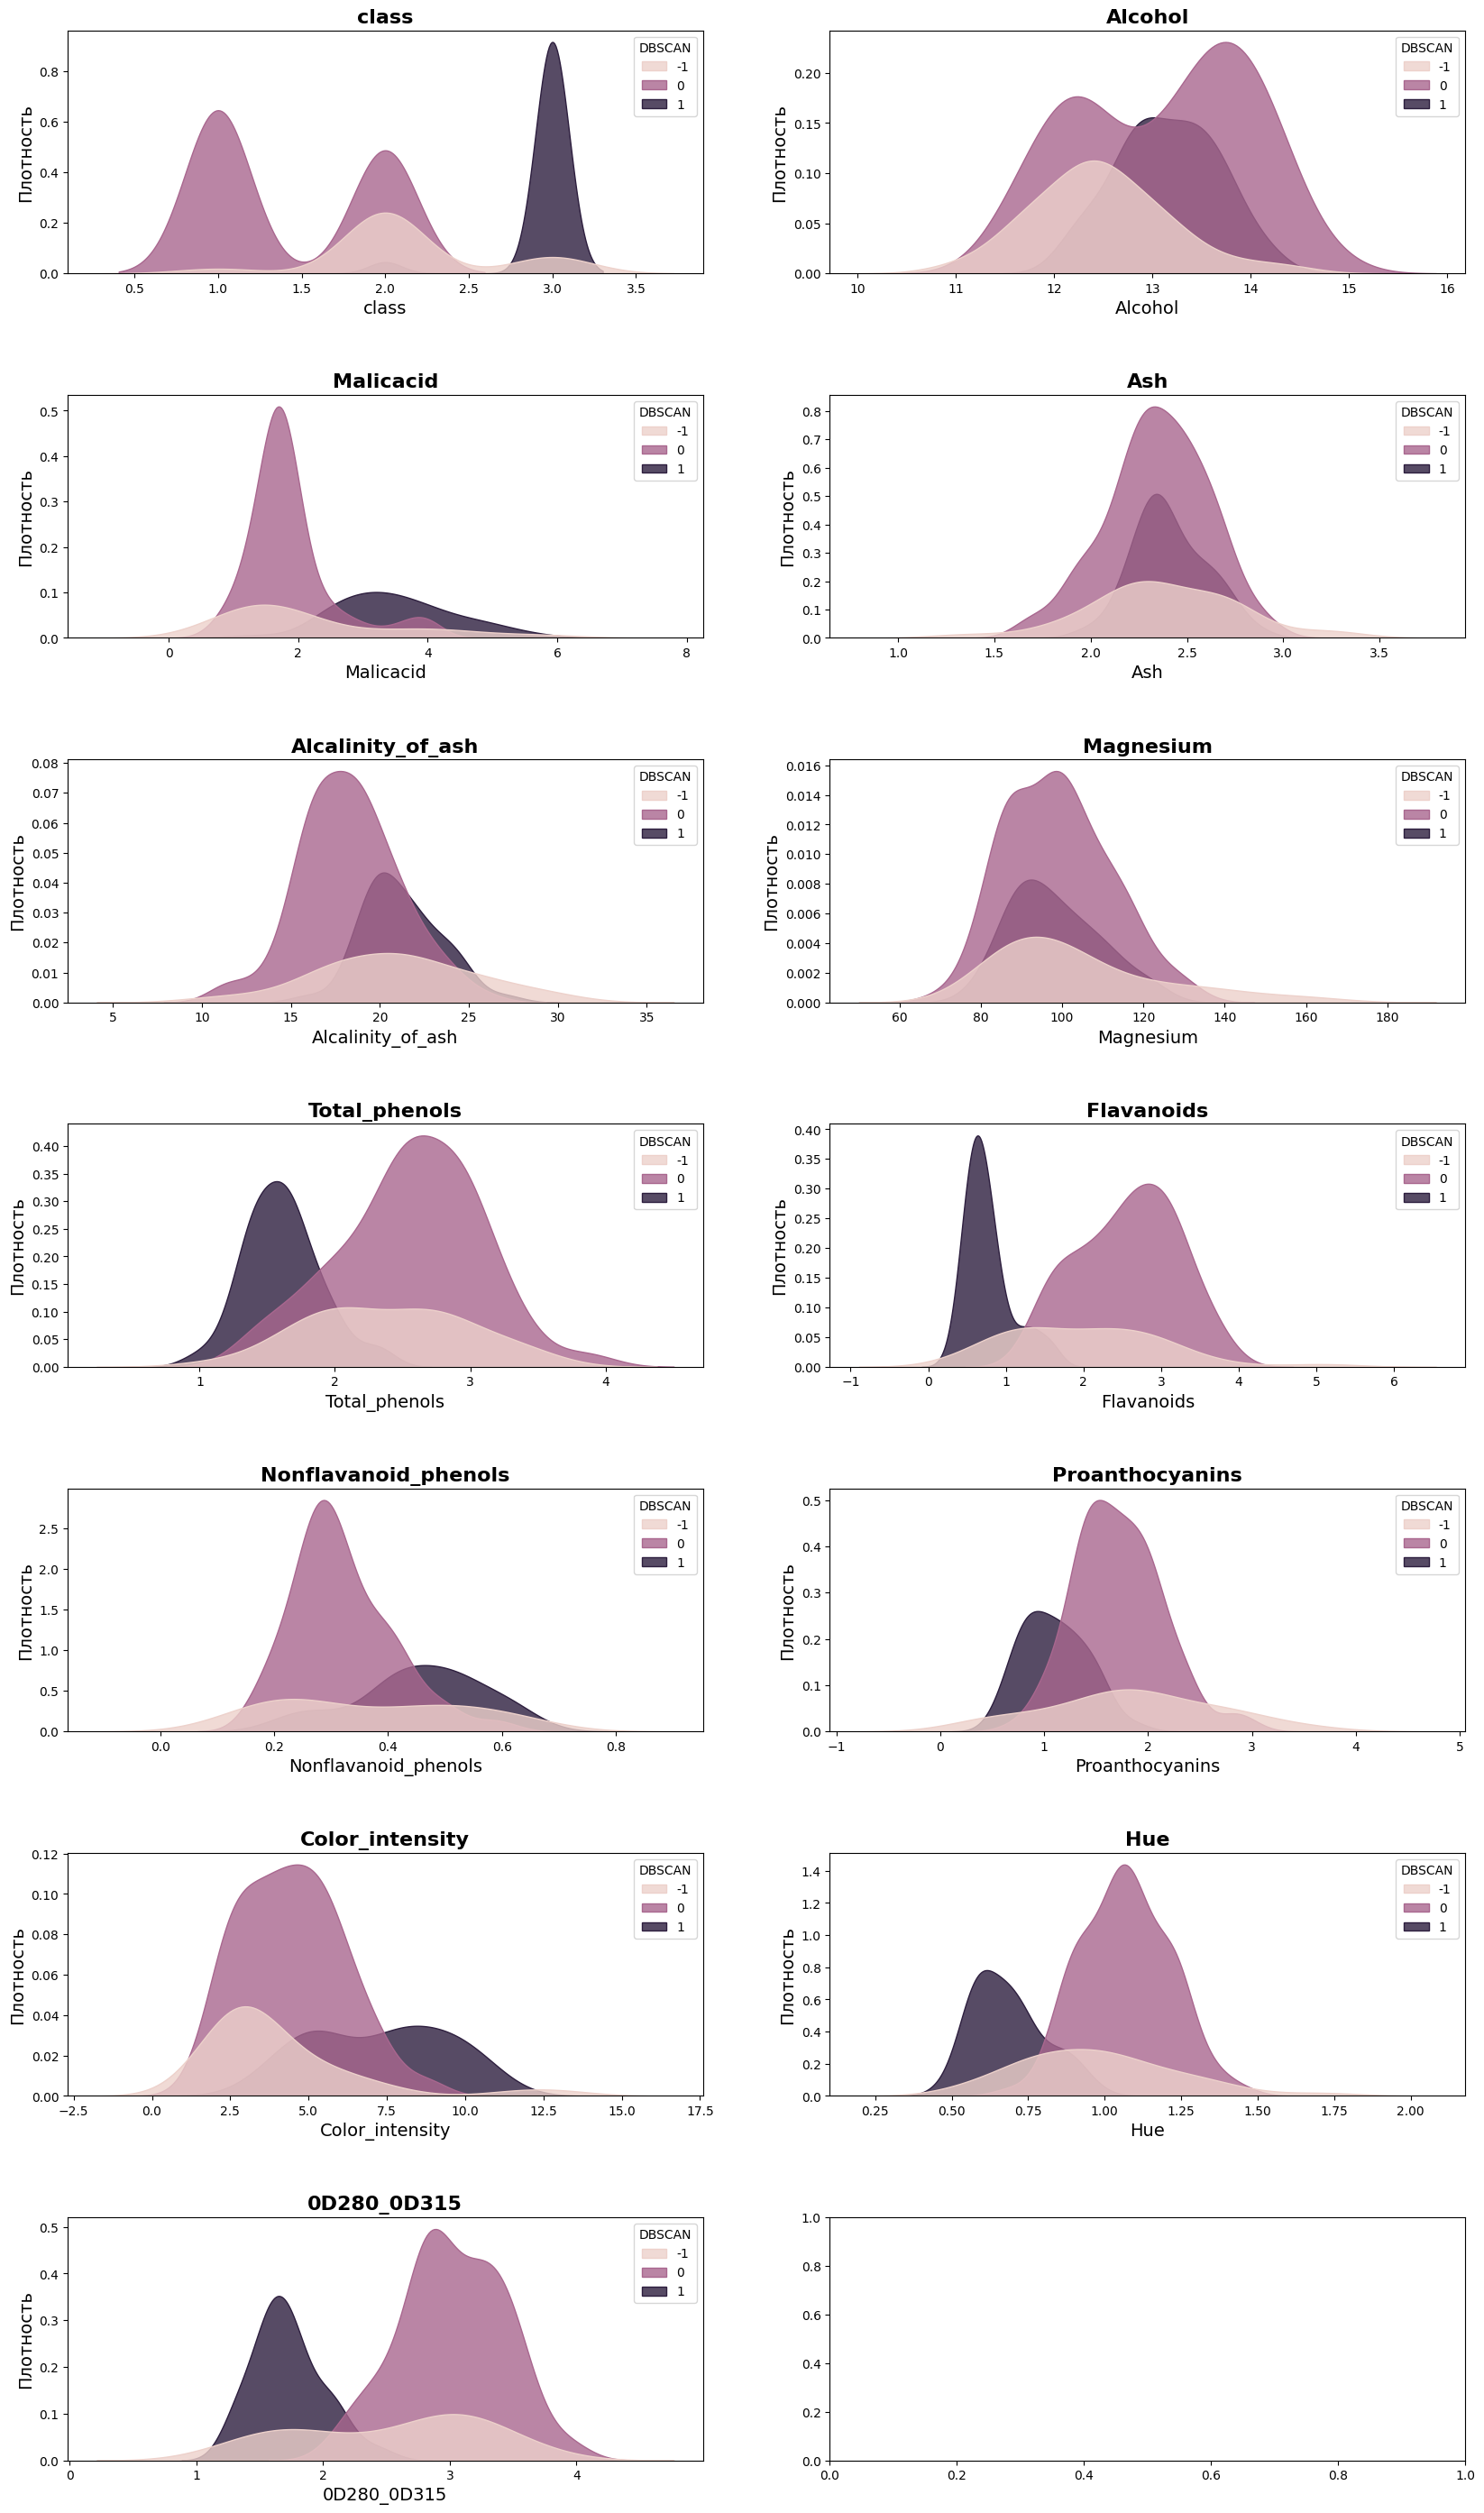

In [ ]:
# Создаем матрицу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(7,2, figsize = (20,35))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Список значений признаков для цикла
columns = df.columns[:-1]

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = df_cluster,
                x = column,
                fill = True,
                alpha = 0.8,
                hue = 'DBSCAN',
                ax = ax)

    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Плотность', fontsize = 14)


plt.show()

Методы, выбранные для моделирования, сработали отлично. DBSCAN показал себя достаточно хорошо, K-Means отработал вполне достойно, но Spectral Clustering и Agglomerative Clustering by Ward показали еще лучшие результаты, предсказав правильно почти 98% данных.
* Agglomerative Clustering и Spectral Clustering показали лучшие результаты по Rand Score и количеству правильно предсказанных объектов.
* K-Means показал средние результаты, а DBSCAN - наихудшие.
* Выбор лучшего алгоритма зависит от конкретных требований к качеству кластеризации.
* Если требуется высокая точность, то Agglomerative Clustering или Spectral Clustering могут быть лучшим выбором.
* Если же требуется простота и скорость, то K-Means может быть приемлемым вариантом.
* Silhouette:
    * Оценивает, насколько хорошо точки данных в кластере похожи на другие точки в том же кластере и непохожи на точки в других кластерах.
    * Значение silhouette колеблется от -1 до 1, где 1 означает идеальную кластеризацию, а 0 означает случайное распределение кластеров.
    * В данном случае silhouette для всех алгоритмов показывает ниже 0.4, это указывает на слабую кластеризацию.
* Variance Ratio Criterion:
    * Оценивает степень, в которой кластеры сформированы точками, которые близки друг к другу.
    * Более низкие значения указывают на более компактные кластеры.
    * В данном случае все алгоритмы, за исключением DBSCAN, показывают схожие значения, что говорит об умеренной дисперсии кластеров.

In [ ]:
df_cluster[['class','K-Means','Agglomerative', 'Spectral', 'DBSCAN']]

,class,K-Means,Agglomerative,Spectral,DBSCAN
0,1,0,2,0,0
1,1,0,2,0,0
2,1,0,2,0,0
3,1,0,2,0,0
4,1,0,0,0,0
...,...,...,...,...,...
173,3,1,1,1,1
174,3,1,1,1,1
175,3,1,1,1,1
176,3,1,1,1,1


# Домашнее задание


## Итоговое задание по курсу "Библиотеки Python для DataScience"

Цель: Проанализировать данные о заработной плате сотрудников из файла ds_salaries.csv и построить модели машинного обучения для прогнозирования заработной платы.

Задачи:

1. Первичный анализ данных:
    * Импортировать данные из файла ds_salaries.csv.
    * Очистить данные от дубликатов и пропущенных значений.
    * Исследовать типы данных, описательную статистику и корреляции между признаками.
    * Визуализировать данные с помощью Matplotlib и Seaborn.
    * Сгенерируйте дополнительные признаки

2. Построение модели линейной регрессии:
    * Разделить данные на обучающую и тестовую выборки.
    * Построить модель линейной регрессии для прогнозирования заработной платы.
    * Оценить качество модели с помощью метрик MAE, MSE и R-квадрат.
    * Проанализировать значимость признаков и мультиколлинеарность.
   

3. Построение модели дерева решений:
    * Построить модель дерева решений для прогнозирования заработной платы.
    * Оценить качество модели с помощью метрик RMSE и R-квадрат.
    * Визуализировать дерево решений
    * Подберите гиперпараметры для модели дерево решений

4. Построение ансамблевой модели:
    * Построить ансамблевую модель, используя Random Forest и Bagging.
    * Сравнить качество ансамблевой модели с отдельными моделями.
    * Оценить важность признаков в ансамблевой модели.

5. Понижение размерности:
    * Применить Principal Component Analysis (PCA) для снижения размерности данных.
    * Построить модель линейной регрессии с использованием данных, полученных после PCA.
    * Сравнить качество модели с использованием исходных данных.

6. Кластеризация:
    * Применить метод K-Means для кластеризации данных по заработной плате.
    * Определить оптимальное количество кластеров.
    * Проанализировать характеристики полученных кластеров.
    * Визуализировать результаты кластеризации и проанализировать характеристики в каждом кластере.
    * Проанализируйте полученные данные и сделайте выводы о том, какой алгоритм кластеризации сможет выделить кластеры лучше, чем K-Means